In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [168]:
x = np.linspace(0,50,501)

In [169]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [170]:
y = np.sin(x)

In [171]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

In [172]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [173]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [174]:
test_percent = 0.1

In [175]:
test_point = np.round(len(df)*test_percent)

In [176]:
test_point

50.0

In [177]:
test_index = int(len(df)-test_point)
test_index

451

In [178]:
test = df.iloc[test_index:]
train = df.iloc[:test_index]

### scaling

In [179]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()

In [180]:
Scaler.fit(train)

MinMaxScaler()

In [181]:
scaled_train = Scaler.transform(train)

In [182]:
scaled_test = Scaler.transform(test)

In [183]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [184]:
#larger the length longer the training time
length = 50
# batch size 1 does well in time series
batch_size = 1
# only 1 feature x
n_features = 1

In [185]:
generator = TimeseriesGenerator(scaled_train,scaled_train, 
                                length=length,batch_size=batch_size)

validation_generator = TimeseriesGenerator(scaled_test,scaled_test, 
                                           length=length-1,
                                           batch_size=batch_size)

In [186]:
len(scaled_train),len(generator)

(451, 401)

In [187]:
generator[0]

(array([[[4.99999116e-01],
         [5.49916225e-01],
         [5.99334579e-01],
         [6.47760405e-01],
         [6.94709850e-01],
         [7.39713809e-01],
         [7.82322618e-01],
         [8.22110545e-01],
         [8.58680040e-01],
         [8.91665714e-01],
         [9.20737985e-01],
         [9.45606372e-01],
         [9.66022399e-01],
         [9.81782075e-01],
         [9.92727935e-01],
         [9.98750612e-01],
         [9.99789928e-01],
         [9.95835500e-01],
         [9.86926839e-01],
         [9.73152957e-01],
         [9.54651478e-01],
         [9.31607263e-01],
         [9.04250562e-01],
         [8.72854714e-01],
         [8.37733417e-01],
         [7.99237589e-01],
         [7.57751870e-01],
         [7.13690771e-01],
         [6.67494535e-01],
         [6.19624741e-01],
         [5.70559686e-01],
         [5.20789614e-01],
         [4.70811810e-01],
         [4.21125636e-01],
         [3.72227539e-01],
         [3.24606094e-01],
         [2.78737119e-01],
 

<AxesSubplot:>

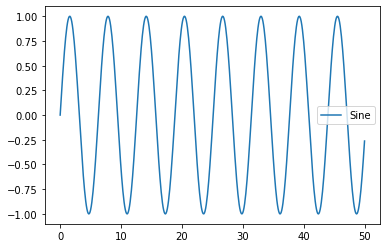

In [188]:
df.plot()

In [189]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [190]:
#simple rnn
model = Sequential()

model.add(SimpleRNN(length, input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [191]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 50)                2600      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [192]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [193]:
model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/20


C:\Users\AMD\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


401/401 [==============================] - 6s 11ms/step - loss: 0.0968 - val_loss: 0.0082
Epoch 2/20
401/401 [==============================] - 4s 9ms/step - loss: 1.2388e-04 - val_loss: 0.0068
Epoch 3/20
401/401 [==============================] - 4s 10ms/step - loss: 4.7324e-05 - val_loss: 0.0059
Epoch 4/20
401/401 [==============================] - 4s 9ms/step - loss: 1.3050e-05 - val_loss: 0.0045
Epoch 5/20
401/401 [==============================] - 4s 9ms/step - loss: 0.0018 - val_loss: 0.0111
Epoch 6/20
401/401 [==============================] - 4s 9ms/step - loss: 2.1286e-05 - val_loss: 0.0091
Epoch 7/20
401/401 [==============================] - 4s 9ms/step - loss: 4.1329e-06 - val_loss: 0.0086
Epoch 8/20
401/401 [==============================] - 4s 9ms/step - loss: 4.5111e-06 - val_loss: 0.0082
Epoch 9/20
401/401 [==============================] - 4s 10ms/step - loss: 1.5014e-06 - val_loss: 0.0083


In [194]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

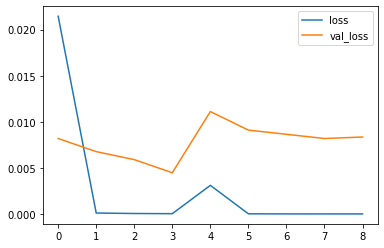

In [195]:
losses.plot()

In [196]:
first_eval_batch = scaled_train[-length:].reshape(1,length,n_features)

In [197]:
test_predictions = []

current_batch = scaled_train[-length:].reshape(1, length, n_features)

In [198]:
for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [199]:
true_predictions = Scaler.inverse_transform(test_predictions)

In [200]:
test['Predictions'] = true_predictions

<ipython-input-200-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:>

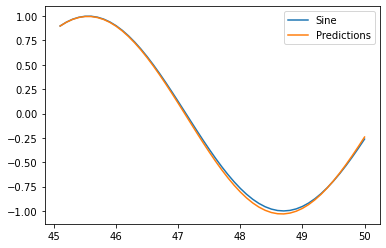

In [201]:
test.plot(figsize=(10,6))

In [202]:
first_eval_batch = scaled_train[-length:].reshape(1,length,n_features)

In [203]:
#simple LSTM
model = Sequential()

model.add(LSTM(length, input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [204]:
model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

C:\Users\AMD\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
401/401 [==============================] - 10s 20ms/step - loss: 0.0406 - val_loss: 4.4028e-06
Epoch 2/20
401/401 [==============================] - 7s 17ms/step - loss: 2.4137e-04 - val_loss: 1.2679e-04
Epoch 3/20
401/401 [==============================] - 8s 19ms/step - loss: 1.2594e-04 - val_loss: 8.2325e-07
Epoch 4/20
401/401 [==============================] - 7s 17ms/step - loss: 5.3737e-04 - val_loss: 1.6372e-05
Epoch 5/20
401/401 [==============================] - 7s 18ms/step - loss: 6.5337e-05 - val_loss: 9.2199e-07
Epoch 6/20
401/401 [==============================] - 7s 18ms/step - loss: 4.5177e-05 - val_loss: 8.0836e-06
Epoch 7/20
401/401 [==============================] - 7s 18ms/step - loss: 6.1394e-05 - val_loss: 1.8178e-07
Epoch 8/20
401/401 [==============================] - 8s 20ms/step - loss: 4.0848e-05 - val_loss: 3.3570e-05
Epoch 9/20
401/401 [==============================] - 9s 23ms/step - loss: 8.5125e-05 - val_loss: 1.1447e-05
Epoch 10/20
401/401 [=

In [205]:
losses = pd.DataFrame(model.history.history)
losses

<AxesSubplot:>

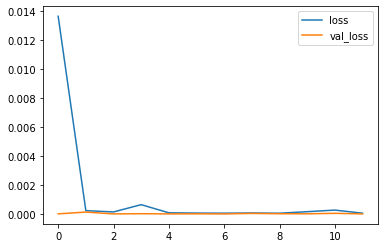

In [207]:
losses[['loss','val_loss']].plot()

In [209]:
test_predictions = []
first_eval_batch = scaled_train[-length:].reshape(1,length,n_features)
current_batch = scaled_train[-length:].reshape(1, length, n_features)

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [211]:
true_predictions = Scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(10,6))

<ipython-input-211-a850ea929d9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_predictions


In [214]:
full_scaler = MinMaxScaler()
scaled_df = full_scaler.fit_transform(df)

In [216]:
generator = TimeseriesGenerator(scaled_df,scaled_df,
                               length=length, batch_size=batch_size)

In [219]:
#simple LSTM
model = Sequential()

model.add(LSTM(length, input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [220]:
model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/20
451/451 [==============================] - 14s 23ms/step - loss: 0.0448 - val_loss: 3.5443e-05
Epoch 2/20
451/451 [==============================] - 8s 17ms/step - loss: 3.6054e-04 - val_loss: 1.0991e-04
Epoch 3/20
451/451 [==============================] - 8s 18ms/step - loss: 1.8823e-04 - val_loss: 4.3714e-07
Epoch 4/20
451/451 [==============================] - 8s 17ms/step - loss: 1.2801e-04 - val_loss: 4.5915e-06
Epoch 5/20
451/451 [==============================] - 8s 17ms/step - loss: 1.0594e-04 - val_loss: 1.9949e-05
Epoch 6/20
451/451 [==============================] - 8s 17ms/step - loss: 7.0599e-05 - val_loss: 5.6568e-05
Epoch 7/20
451/451 [==============================] - 8s 17ms/step - loss: 1.0503e-04 - val_loss: 1.8140e-06
Epoch 8/20
451/451 [==============================] - 8s 17ms/step - loss: 4.7216e-05 - val_loss: 1.2028e-08
Epoch 9/20
451/451 [==============================] - 8s 17ms/step - loss: 4.6852e-05 - val_loss: 3.6349e-05
Epoch 10/20
451/451 [=

<AxesSubplot:>

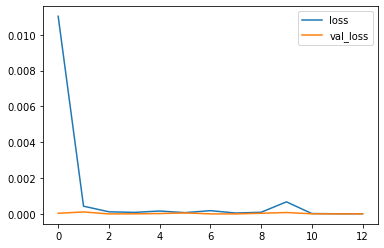

In [221]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [222]:
test_predictions = []
first_eval_batch = scaled_train[-length:].reshape(1,length,n_features)
current_batch = scaled_train[-length:].reshape(1, length, n_features)

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

<ipython-input-223-42a28a614f3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_predictions


<AxesSubplot:>

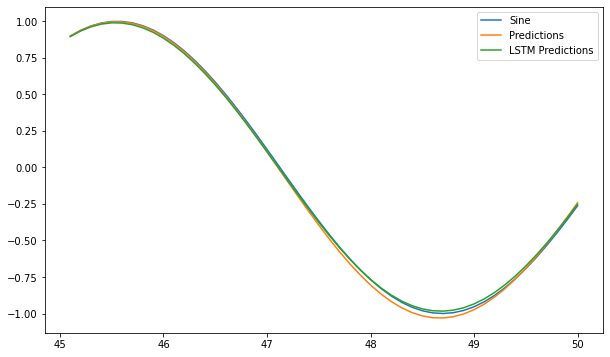

In [223]:
true_predictions = Scaler.inverse_transform(test_predictions)
test['Full scale LSTM Predictions'] = true_predictions
test.plot(figsize=(10,6))

In [251]:
len(test)

50

In [305]:
length = 50
step_size = 0.1

In [306]:
#forecase
forecast = []
first_eval_batch = scaled_train[-length:].reshape(1,length,n_features)
current_batch = scaled_train[-length:].reshape(1, length, n_features)

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [307]:
forecast = Scaler.inverse_transform(forecast)

In [308]:
forecast_index = np.arange(length + step_size,length + length*0.1 + step_size,
                           step_size)

In [309]:
(forecast_index.reshape(-1,1)).shape, forecast.shape

((50, 1), (50, 1))

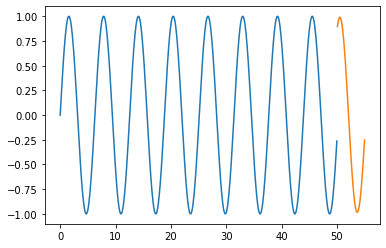

In [310]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index.reshape(-1,1),forecast)